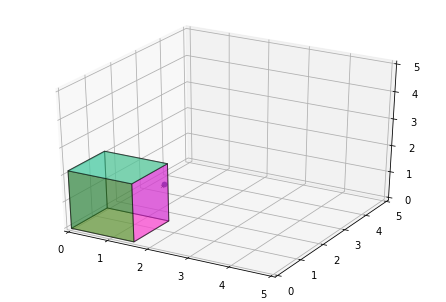

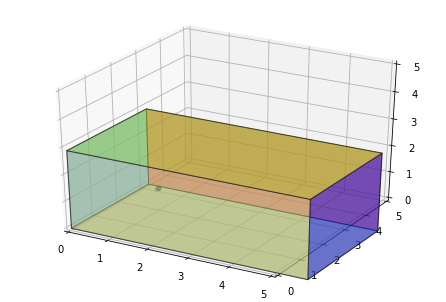

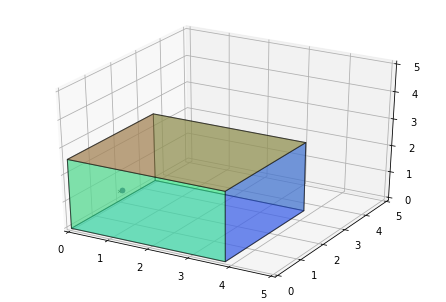

In [37]:
from room_simulator import room_simulator as rs
import matplotlib.pyplot as plt
n=None
n=rs(N_mutations_per_roomtype=1,roomtype="toilet")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()
    
n=rs(N_mutations_per_roomtype=1,roomtype="livingroom")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()
    
n=rs(N_mutations_per_roomtype=1,roomtype="bathroom")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()

In [5]:
from room_simulator import room_simulator as rs
import numpy as np
import time
import multiprocessing
from pathlib import Path

def spawn(num,roomtype):
    num='{0:03d}'.format(num)
    nn=rs(N_mutations_per_roomtype=2,roomtype=roomtype)
    print("Thread "+num+" "+roomtype+": genererated "+str(len(nn.rooms))+" rooms.")
    Path('data/'+roomtype).mkdir(parents=True, exist_ok=True)
    with open('data/'+roomtype+'/signal_'+num+'.csv','ab') as f_signal:
        with open('data/'+roomtype+'/rir_'+num+'.csv','ab') as f_rir:
            for i,r in enumerate(nn.rooms):
                r.compute_rir()
                r.simulate()
                ################
                signal=[list(r.mic_array.signals[0,:])+[0.0]*(200000-len(r.mic_array.signals[0,:]))]
                np.savetxt(f_signal, signal, fmt='%10.5f', delimiter=',')
                rir=[list(r.rir[0][0])+[0.0]*(200000-len(r.rir[0][0]))]
                np.savetxt(f_rir, rir, fmt='%10.5f', delimiter=',')
                ################
                print("Thread "+num+": room "+str(i)+" finished!" )
    return 1
if __name__ == '__main__':
    start = time.time()
    jobs=[]
    for i in range(1):
        for j,t in enumerate(["toilet","livingroom","bathroom"]):
            p = multiprocessing.Process(target=spawn, args=(i*3+j,t))
            jobs.append(p)
            p.start()
    #p.join()    
    end = time.time()
    print("finish")
    print(end - start)
    print(jobs)

finish
0.04881405830383301
[<Process(Process-13, started)>, <Process(Process-14, started)>, <Process(Process-15, started)>]
Thread 001 livingroom: genererated 2 rooms.
Thread 000 toilet: genererated 2 rooms.
Thread 002 bathroom: genererated 2 rooms.
Thread 001: room 0 finished!
Thread 002: room 0 finished!
Thread 001: room 1 finished!
Thread 002: room 1 finished!
Thread 000: room 0 finished!
Thread 000: room 1 finished!
